In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regex as re
#pandas.read_excel('cat.xlsx', engine='openpyxl')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Keller GroundWorks CRM Data 1.txt", sep = "\t", encoding = "ISO-8859-1", low_memory=False)

In [3]:
df2 = pd.read_csv("Keller GroundWorks CRM Data 2.txt", sep = "\t", encoding = "ISO-8859-1", low_memory=False)

In [4]:
df_1=df1
df_2=df2

In [40]:
df1=df_1
df2=df_2

In [5]:
df1 = df1[(df1["o_OpportunityStatus"]=="Won") | (df1["o_OpportunityStatus"]=="Lost")]
df2 = df2[(df2["o_OpportunityStatus"]=="Won") | (df2["o_OpportunityStatus"]=="Lost")]

In [6]:
df = pd.concat((df1,df2))

In [7]:
duplicates = df.duplicated(['o_OPPORTUNITYID'], keep='first')
df = df[~duplicates]
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

## Zamiana na float danych liczbowych

In [8]:
df_12=df["sq_HC_ESTGMPCT"].astype("str")
df_123=df_12.apply(lambda x: x.replace(',', '.'))
df_1234=df_123.astype("float")
df["sq_HC_ESTGMPCT"]=df_1234

In [9]:
df_12=df["sq_HC_AMOUNT"].astype("str")
df_123=df_12.apply(lambda x: x.replace(',', '.'))
df_1234=df_123.astype("float")
df["sq_HC_AMOUNT"]=df_1234

In [10]:
df_12=df["sq_HC_ESTCOST"].astype("str")
df_123=df_12.apply(lambda x: x.replace(',', '.'))
df_1234=df_123.astype("float")
df["sq_HC_ESTCOST"]=df_1234

In [11]:
df_12=df["sq_HC_ESTGM"].astype("str")
df_123=df_12.apply(lambda x: x.replace(',', '.'))
df_1234=df_123.astype("float")
df["sq_HC_ESTGM"]=df_1234

In [12]:
df["sq_HC_AMOUNT"].dropna(how='any',inplace=True)
df["sq_HC_ESTCOST"].dropna(how='any',inplace=True)
df["sq_HC_ESTGM"].dropna(how='any',inplace=True)
df["sq_HC_ESTGMPCT"].dropna(how='any',inplace=True)

### Primary Technique

In [13]:
df_12=df["o_HC_PRIMARYTECHNIQUE"].astype("str")
df_123=df_12.apply(lambda x: x[1:4])
#df_1234=df_123.astype("int")
df["o_HC_PRIMARYTECHNIQUE"]=df_123
df=df[df["o_HC_PRIMARYTECHNIQUE"]!="an"]

## Filtrowanie danych liczbowych

In [ ]:
#df=df[(df["sq_HC_ESTGMPCT"]>=0)&(df["sq_HC_ESTGMPCT"]<=100)]

In [ ]:
#df=df[(df["o_HC_FUNDINGID"]!="Canopy")&(df["o_HC_FUNDINGID"]!="state")&(df["o_HC_FUNDINGID"]!="private")&(df["o_HC_FUNDINGID"]!="PRIvate")&(df["o_HC_FUNDINGID"]!="fed/State")&(df["o_HC_FUNDINGID"]!="local")]

In [15]:
df[df["o_HC_FUNDINGID"]=="PRIvate"]="Private"
df[df["o_HC_FUNDINGID"]=="fed/State"]="Fed/State"
df[df["o_HC_FUNDINGID"]=="local"]="Local"
df[df["o_HC_FUNDINGID"]=="private"]="Private"
df[df["o_HC_FUNDINGID"]=="state"]="State"
df=df[df["o_HC_FUNDINGID"]!="Canopy"]

## Dalsze filtrowanie

In [14]:
import dtale
d = dtale.show(df)
d.open_browser()

2021-08-12 10:17:26,107 - INFO     - NumExpr defaulting to 4 threads.


# ENCODING

In [223]:
from sklearn.preprocessing import LabelEncoder
is_nan = df['o_OpportunityStatus'].isnull()
df['o_OpportunityStatus']=pd.Series(LabelEncoder().fit_transform(df['o_OpportunityStatus']), index=df.index).where(~is_nan, 0)


In [224]:
from sklearn.preprocessing import LabelEncoder
is_nan = df['o_HC_STATE'].isnull()
df['o_HC_STATE']=pd.Series(LabelEncoder().fit_transform(df['o_HC_STATE']), index=df.index).where(~is_nan, 0)


In [225]:
from sklearn.preprocessing import LabelEncoder
is_nan = df['o_HC_FUNDINGID'].isnull()
df['o_HC_FUNDINGID']=pd.Series(LabelEncoder().fit_transform(df['o_HC_FUNDINGID']), index=df.index).where(~is_nan, 0)


In [226]:
from sklearn.preprocessing import LabelEncoder
is_nan = df['o_HC_MARKETID'].isnull()
df['o_HC_MARKETID']=pd.Series(LabelEncoder().fit_transform(df['o_HC_MARKETID']), index=df.index).where(~is_nan, 0)


In [227]:
from sklearn.preprocessing import LabelEncoder
is_nan = df['o_TechniqueGroup'].isnull()
df['o_TechniqueGroup']=pd.Series(LabelEncoder().fit_transform(df['o_TechniqueGroup']), index=df.index).where(~is_nan, 0)


In [228]:
from sklearn.preprocessing import LabelEncoder
is_nan = df['br_SEGMENT'].isnull()
df['br_SEGMENT']=pd.Series(LabelEncoder().fit_transform(df['br_SEGMENT']), index=df.index).where(~is_nan, 0)


In [207]:
result = pd.concat([df12, df23,df34,df45,df56,df67], axis=1)

In [211]:
result

0   0  0   0   0   0
0      0   7  5  29  25   7
1      0   7  5  29  11   7
2      1  70  1  40  34   7
3      0   9  1  46  19   7
4      0  60  1  41  34   7
...   ..  .. ..  ..  ..  ..
32313  0   9  5  38  36   7
32314  1  68  5  20  33   7
32315  1  68  5  13  33  14
32316  1  69  5  37  37   7
32317  1   9  3   5  29   8

[32318 rows x 6 columns]

In [210]:
import dtale
e = dtale.show(result)
e.open_browser()

Exception: data contains duplicated column names: 0

# WYKRESY


In [15]:
gr = df[['o_OpportunityStatus', "br_CountryRegionName", "ID"]].groupby(["br_CountryRegionName", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["br_CountryRegionName"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["br_CountryRegionName"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["br_CountryRegionName"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
dfwT=df_plot.loc[(df_plot.index == "Won")]
df_w=dfwT.T
df_w = df_w.reset_index()
df_w['size'] = df_w["Won"].pow(0.2)
fig = px.scatter_geo(df_w, locations="index", locationmode='country names', 
                     color="Won", size='size', hover_name="index", 
                     range_color= [0, max(df_w['Won'])+2], 
                     projection="natural earth",  
                     title='Sales by countries',
                     template="seaborn")

fig.show()

In [16]:
gr = df[['o_OpportunityStatus', "it_STATE", "ID"]].groupby(["it_STATE", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
df_plot = pd.DataFrame()
for col in np.unique(gr2["it_STATE"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["it_STATE"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["it_STATE"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
df_plot=df_plot.T
df_plot=df_plot.dropna()
df_plot["Sum"]=df_plot["Won"]+df_plot["Lost"]
df_a=df_plot["Sum"]
df_a=df_a.to_frame()
df_a=df_a.reset_index()
df_a['size'] = df_a["Sum"].pow(0.3)
fig = px.scatter_geo(df_a, locations="index", locationmode='USA-states', 
                     color="Sum", size='size', hover_name="index", 
                     range_color= [0, max(df_a['Sum'])+2], 
                     projection="albers usa",  
                     title='All contracts in USA',
                     template="seaborn")

fig.show(width=110, height=110)
plt.savefig("USA-all.png")

<Figure size 432x288 with 0 Axes>

In [17]:
gr = df[['o_OpportunityStatus', "it_STATE", "ID"]].groupby(["it_STATE", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["it_STATE"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["it_STATE"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["it_STATE"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
dfwT=df_plot.loc[(df_plot.index == "Won")]
df_w=dfwT.T
df_w = df_w.reset_index()
df_w=df_w.dropna()
df_w['size'] = df_w["Won"].pow(0.3)
fig = px.scatter_geo(df_w, locations="index", locationmode='USA-states', 
                     color="Won", size='size', hover_name="index", 
                     range_color= [0, max(df_w['Won'])+2], 
                     projection="albers usa",  
                     title='Won contracts in USA',
                     template="seaborn")

fig.show()

In [18]:
gr = df[['o_OpportunityStatus', "it_STATE", "ID"]].groupby(["it_STATE", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["it_STATE"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["it_STATE"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["it_STATE"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
dfwT=df_plot.loc[(df_plot.index == "Lost")]
df_w=dfwT.T
df_w = df_w.reset_index()
df_w=df_w.dropna()
df_w['size'] = df_w["Lost"].pow(0.3)
fig = px.scatter_geo(df_w, locations="index", locationmode='USA-states', 
                     color="Lost", size='size', hover_name="index", 
                     range_color= [0, max(df_w['Lost'])+2], 
                     projection="albers usa",  
                     title='Lost contracts in USA',
                     template="seaborn")

fig.show()

In [19]:
plt.style.use('seaborn-pastel')

## FUNDING_ID

In [25]:
#dfxx=df_plot.T
#dfxx.fillna(0, inplace=True)
#dfxx.sort_values(by="Won",ascending=True)

In [17]:
df_plot2.drop("PRIvate", inplace=True)
df_plot2.drop("fed/State", inplace=True)
df_plot2.drop("local", inplace=True)
df_plot2.drop("Canopy", inplace=True)
df_plot2.drop("state", inplace=True)
df_plot2.drop("private", inplace=True)
df_plot2

KeyError: "['PRIvate'] not found in axis"

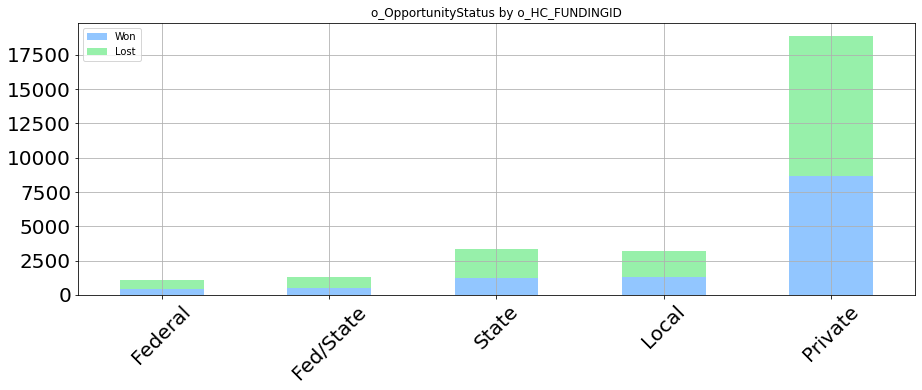

In [54]:
## Bar plot
gr = df[['o_OpportunityStatus', "o_HC_FUNDINGID", "ID"]].groupby(["o_HC_FUNDINGID", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_HC_FUNDINGID"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_HC_FUNDINGID"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_HC_FUNDINGID"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]
df_plot2.drop("PRIvate", inplace=True)
df_plot2.drop("fed/State", inplace=True)
df_plot2.drop("local", inplace=True)
df_plot2.drop("Canopy", inplace=True)
df_plot2.drop("state", inplace=True)
df_plot2.drop("private", inplace=True)
df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Won",ascending=True, inplace=True)
df_plot2.plot(kind="bar",legend=True,fontsize=20,grid=True,figsize = (15,5), rot=45,logy=False,title = "o_OpportunityStatus by o_HC_FUNDINGID",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("funding_id_winloss.png", dpi=400,bbox_inches='tight',)

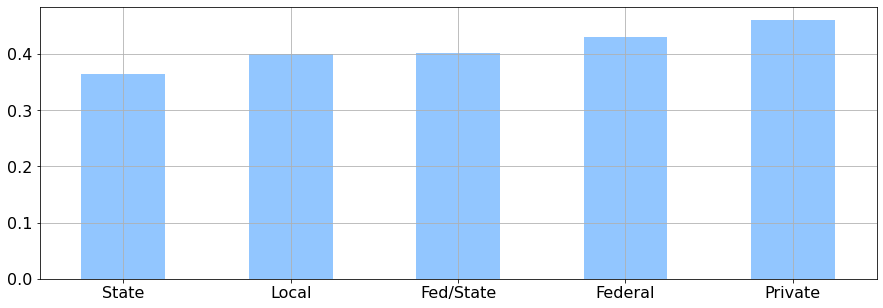

In [21]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=0, fontsize=16,grid=True)
# %%
plt.savefig("funding_id_percent.png", dpi=400)

## Primary Technique

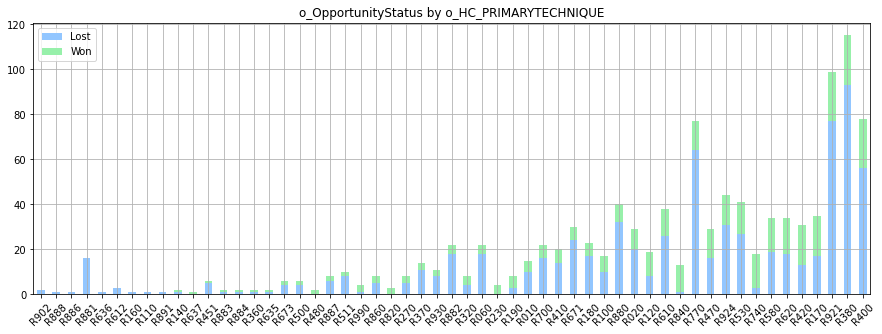

In [37]:
## Bar plot
gr = df[['o_OpportunityStatus', "o_HC_PRIMARYTECHNIQUE", "ID"]].groupby(["o_HC_PRIMARYTECHNIQUE", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_HC_PRIMARYTECHNIQUE"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_HC_PRIMARYTECHNIQUE"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_HC_PRIMARYTECHNIQUE"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]
df_plot2.drop("Revenue", inplace=True)
df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Won",ascending=True, inplace=True)
df_plot2=df_plot2.iloc[:55]
df_plot2.plot(kind="bar",figsize = (15,5), grid=True,rot=45,logy=False,title = "o_OpportunityStatus by o_HC_PRIMARYTECHNIQUE",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("primary_tech_1.png", dpi=400)

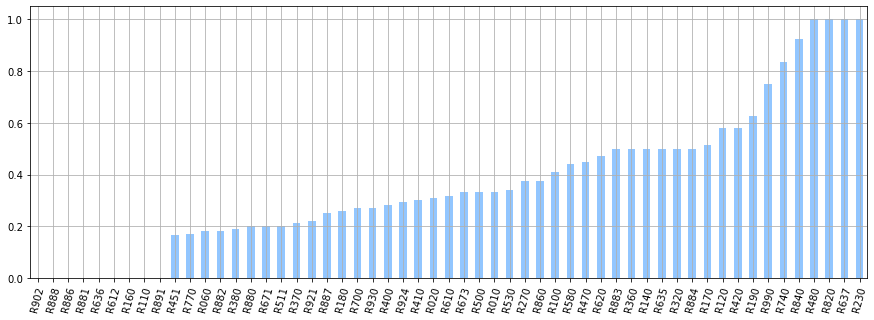

In [38]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75, grid=True)
# %%
plt.savefig("primary_tech_1_percent.png", dpi=400)

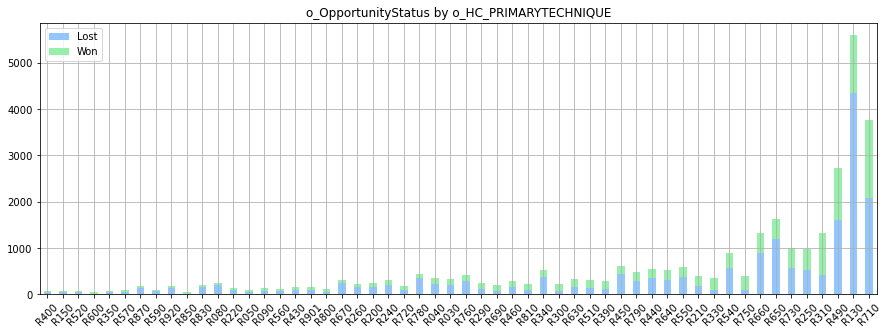

In [39]:
## Bar plot
gr = df[['o_OpportunityStatus', "o_HC_PRIMARYTECHNIQUE", "ID"]].groupby(["o_HC_PRIMARYTECHNIQUE", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_HC_PRIMARYTECHNIQUE"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_HC_PRIMARYTECHNIQUE"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_HC_PRIMARYTECHNIQUE"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]

df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Won",ascending=True, inplace=True)
df_plot2=df_plot2.iloc[55:]
df_plot2.plot(kind="bar",grid=True,figsize = (15,5), rot=45,logy=False,title = "o_OpportunityStatus by o_HC_PRIMARYTECHNIQUE",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("primary_tech_2.png", dpi=400)

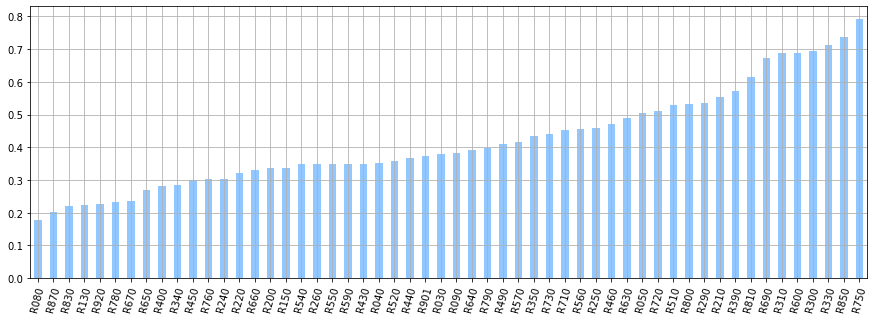

In [40]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75,grid=True)
# %%
plt.savefig("primary_tech_2_percent.png", dpi=400)

## Influencer Role

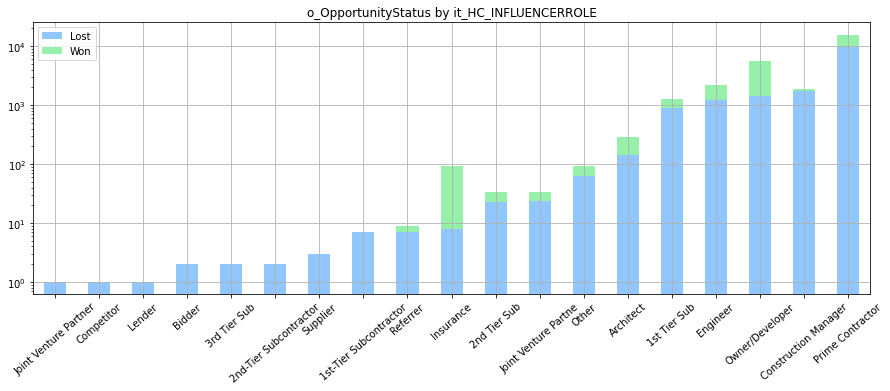

In [41]:
## Bar plot
gr = df[['o_OpportunityStatus', "it_HC_INFLUENCERROLE", "ID"]].groupby(["it_HC_INFLUENCERROLE", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["it_HC_INFLUENCERROLE"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["it_HC_INFLUENCERROLE"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["it_HC_INFLUENCERROLE"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]


df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5),grid=True, rot=41,logy=True,title = "o_OpportunityStatus by it_HC_INFLUENCERROLE",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("influencer_role.png", dpi=400,bbox_inches="tight",pad_inches=2)

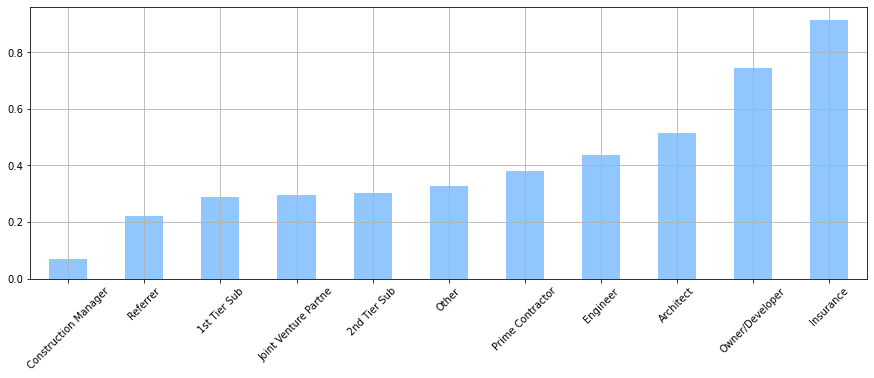

In [42]:
# %%
df_plot2.drop("Joint Venture Partner", inplace=True)
df_plot2.drop("Competitor", inplace=True)
df_plot2.drop("Lender", inplace=True)
df_plot2.drop("Bidder", inplace=True)
df_plot2.drop("3rd Tier Sub", inplace=True)
df_plot2.drop("2nd-Tier Subcontractor", inplace=True)
df_plot2.drop("1st-Tier Subcontractor", inplace=True)
df_plot2.drop("Supplier", inplace=True)
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=45, grid=True)
# %%
plt.savefig("influencer_role_percent.png", dpi=400,bbox_inches="tight",pad_inches=2)

In [44]:
#df["sq_HC_AMOUNT"].astype(float)
#df["sq_HC_ESTCOST"].astype(float)
#df["sq_HC_ESTGM"].astype(float)

#df_cash=df[(df["sq_HC_AMOUNT"]<1200000) & (df["sq_HC_AMOUNT"]>50000)]
#df_cash=df[(df["sq_HC_ESTCOST"]<5000000) & (df["sq_HC_ESTCOST"]>21000)]
#df_cash=df[(df["sq_HC_ESTGM"]<2000000) & (df["sq_HC_ESTGM"]>10000)]

## Technique Name

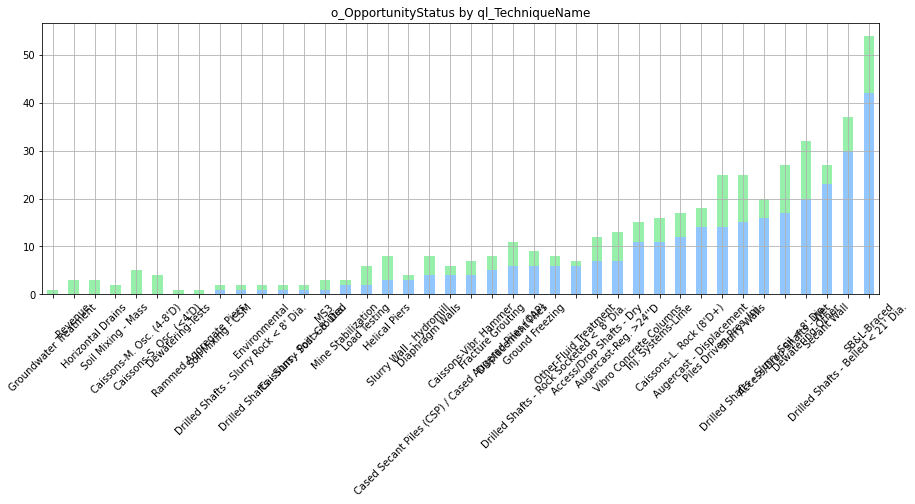

In [31]:
## Bar plot
gr = df[['o_OpportunityStatus', "ql_TechniqueName", "ID"]].groupby(["ql_TechniqueName", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["ql_TechniqueName"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["ql_TechniqueName"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["ql_TechniqueName"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,  (df_plot.index == "Lost") | (df_plot.index == "Won")]

df_plot2.fillna(0, inplace=True)
df_plot2=df_plot2.iloc[:40]
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",legend=False,figsize = (15,5),grid=True, rot=45,logy=False,title = "o_OpportunityStatus by ql_TechniqueName",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("technique_name_1.png", dpi=400,bbox_inches="tight",pad_inches=1)

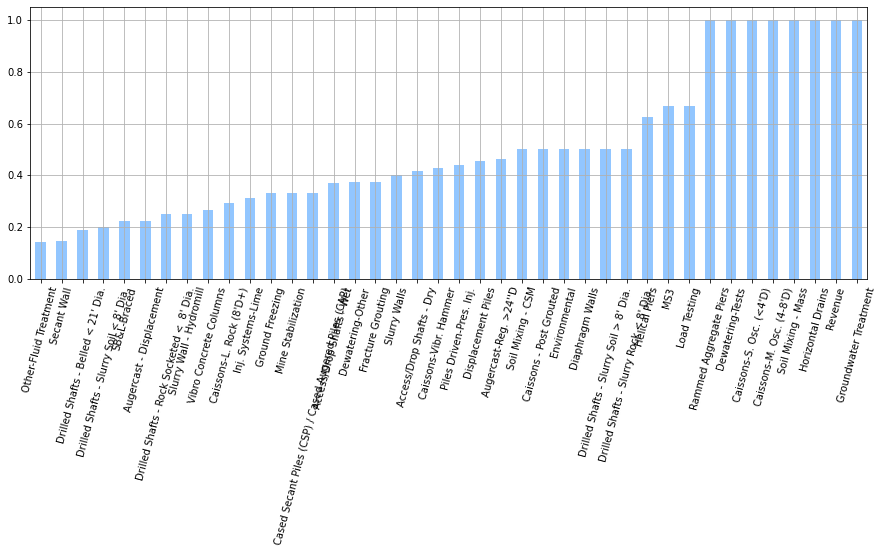

In [32]:
# %%
df_plot2=df_plot2
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75,grid=True)
# %%
plt.savefig("technique_group_1_percent.png", dpi=400,bbox_inches="tight",pad_inches=1)

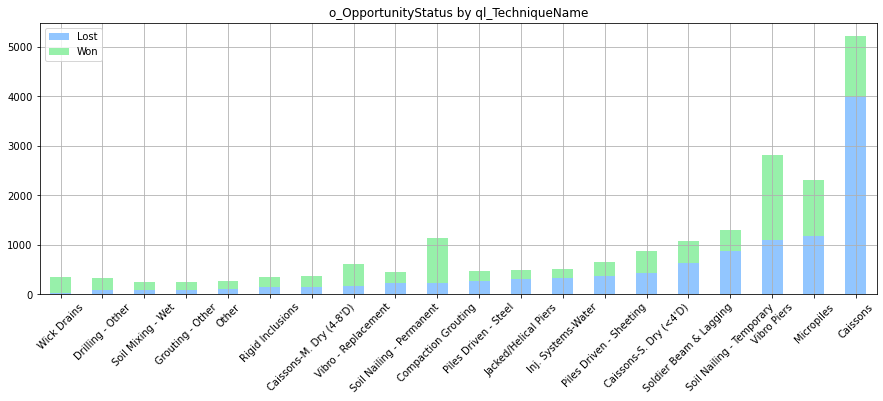

In [81]:
## Bar plot
gr = df[['o_OpportunityStatus', "ql_TechniqueName", "ID"]].groupby(["ql_TechniqueName", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["ql_TechniqueName"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["ql_TechniqueName"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["ql_TechniqueName"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,  (df_plot.index == "Lost") | (df_plot.index == "Won")]

df_plot2.fillna(0, inplace=True)
df_plot2=df_plot2.iloc[84:104]
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",legend=True,figsize = (15,5),grid=True, rot=45,logy=False,title = "o_OpportunityStatus by ql_TechniqueName",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("technique_name_1.png", dpi=400,bbox_inches="tight",pad_inches=1)

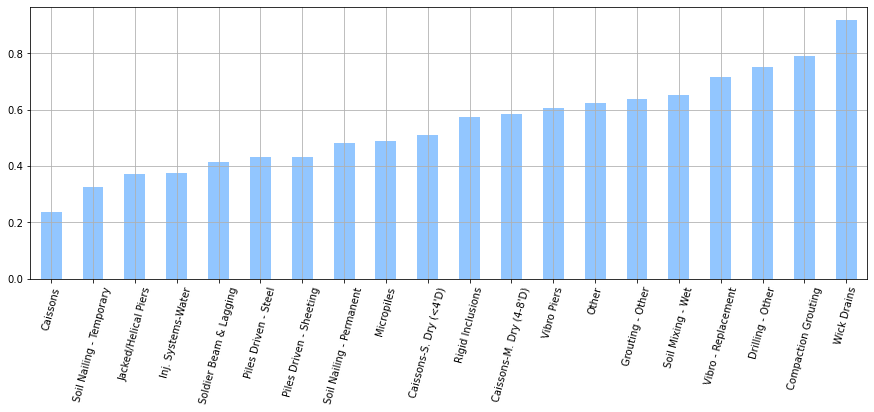

In [83]:
# %%
df_plot2=df_plot2
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75,grid=True)
# %%
plt.savefig("technique_name_1_percent.png", dpi=400,bbox_inches="tight",pad_inches=1)

## Technique Group

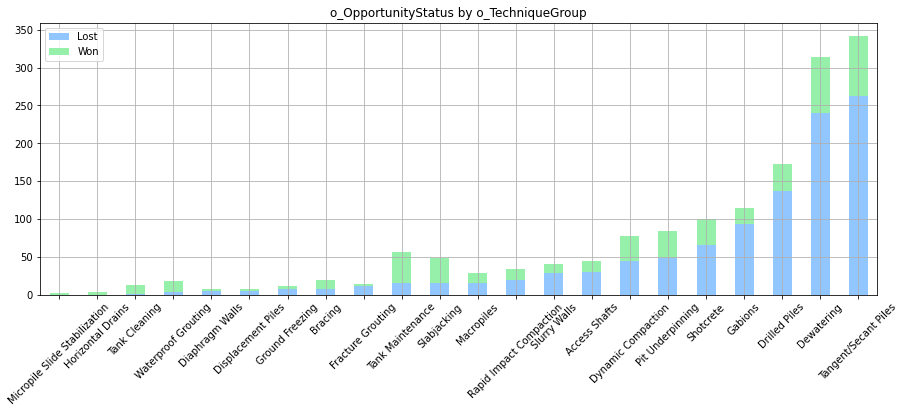

In [84]:
## Bar plot
gr = df[['o_OpportunityStatus', "o_TechniqueGroup", "ID"]].groupby(["o_TechniqueGroup", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_TechniqueGroup"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_TechniqueGroup"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_TechniqueGroup"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,  (df_plot.index == "Lost") | (df_plot.index == "Won")]

df_plot2.fillna(0, inplace=True)
df_plot2=df_plot2.iloc[:22]
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5),grid=True, rot=45,logy=False,title = "o_OpportunityStatus by o_TechniqueGroup",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("technique_group_11.png", dpi=400,bbox_inches="tight",pad_inches=1)

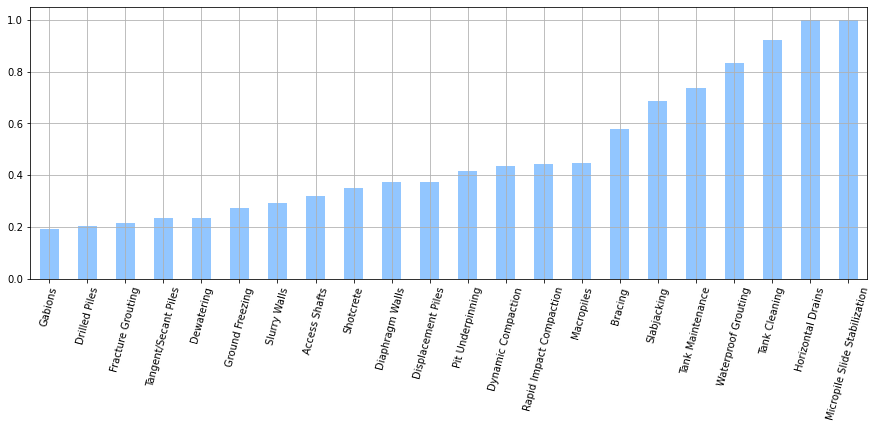

In [85]:
# %%
df_plot2=df_plot2
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75,grid=True)
# %%
plt.savefig("technique_group_11_percent.png", dpi=400,bbox_inches="tight",pad_inches=1)

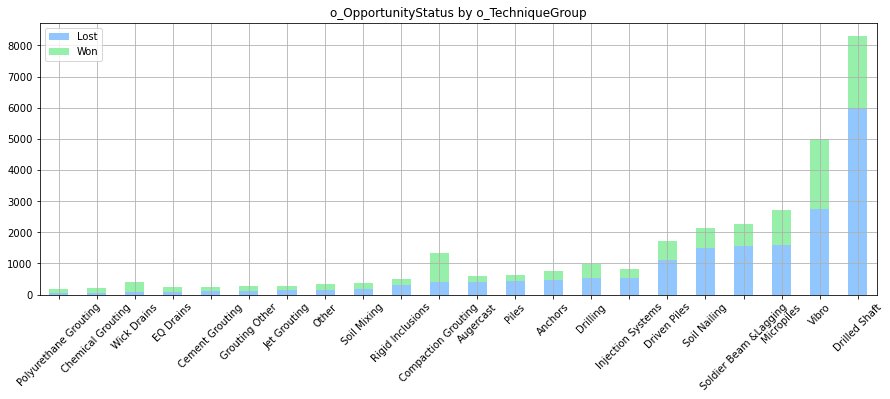

In [86]:
## Bar plot
gr = df[['o_OpportunityStatus', "o_TechniqueGroup", "ID"]].groupby(["o_TechniqueGroup", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_TechniqueGroup"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_TechniqueGroup"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_TechniqueGroup"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,  (df_plot.index == "Lost") | (df_plot.index == "Won")]

df_plot2.fillna(0, inplace=True)
df_plot2=df_plot2.iloc[22:]
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5), grid=True,rot=45,logy=False,title = "o_OpportunityStatus by o_TechniqueGroup",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("technique_group_22.png", dpi=400,bbox_inches="tight",pad_inches=1)

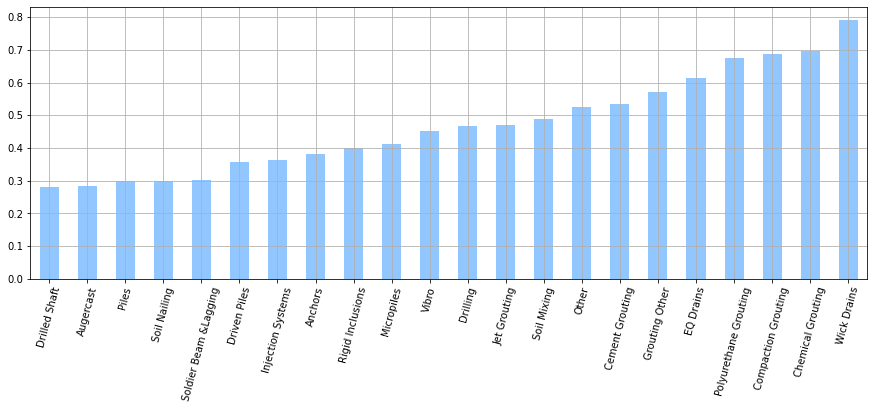

In [87]:
# %%
df_plot2=df_plot2
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75,grid=True)
# %%
plt.savefig("technique_group_22_percent.png", dpi=400,bbox_inches="tight",pad_inches=1)

## Market ID

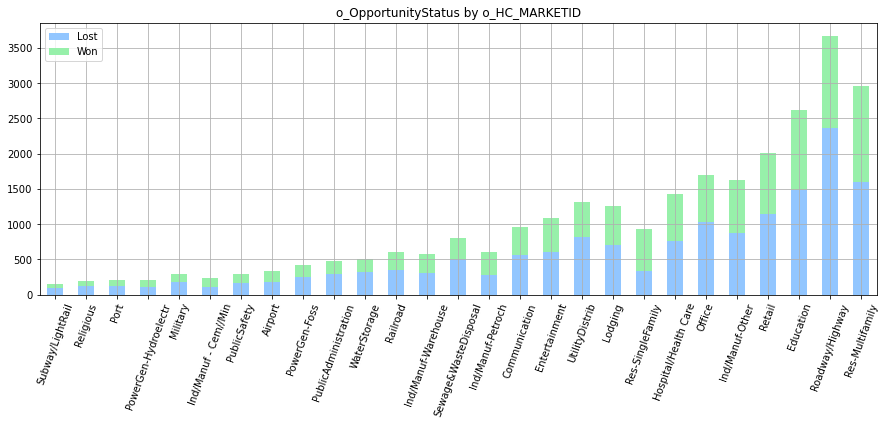

In [88]:
# %%
#df = pd.read_csv("Keller GroundWorks CRM Data 1.txt", sep = "\t", encoding = "ISO-8859-1")
# %%
## Bar plot
gr = df[['o_OpportunityStatus', "o_HC_MARKETID", "ID"]].groupby(["o_HC_MARKETID", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_HC_MARKETID"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_HC_MARKETID"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_HC_MARKETID"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
#df_plot.loc[(df_plot.index == "Won") | (df_plot.index == "Lost") ,:].T.plot.bar(figsize = (15,5), logy=True, rot=75) #df_plot.columns != "Drilled Shaft"]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]
df_plot2=df_plot2.iloc[22:]
df_plot2.drop("roadway/Highway", inplace=True)
df_plot2.drop("office", inplace=True)
df_plot2.drop("education", inplace=True)
df_plot2.drop("road", inplace=True)
df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Won",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5), rot=70,grid=True,logy=False,title = "o_OpportunityStatus by o_HC_MARKETID",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("market_id_1", dpi=400,bbox_inches="tight",pad_inches=1)

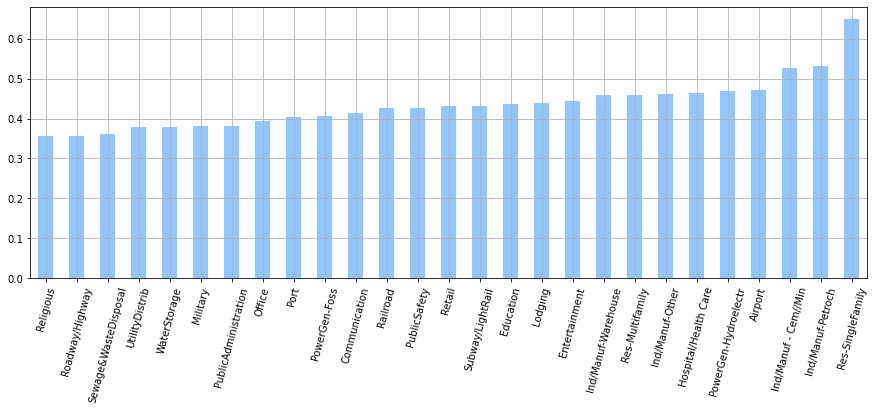

In [89]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75, grid=True)
# %%
plt.savefig("market_id_1_percent", dpi=400,bbox_inches="tight",pad_inches=1)

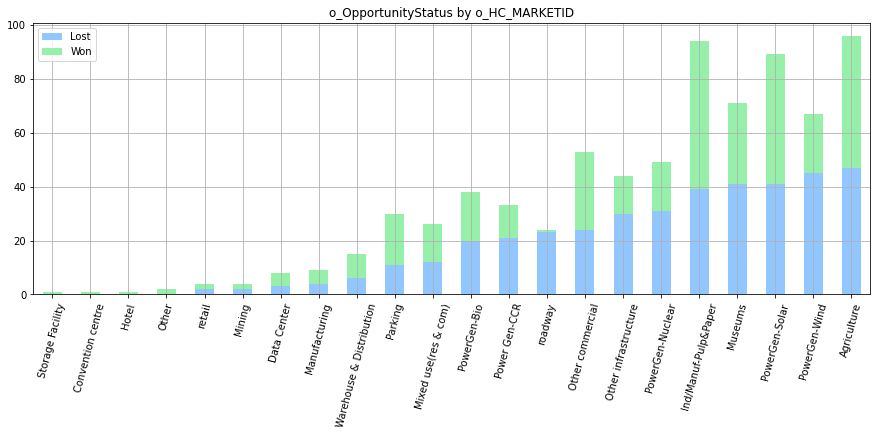

In [65]:
# %%
#df = pd.read_csv("Keller GroundWorks CRM Data 1.txt", sep = "\t", encoding = "ISO-8859-1")
# %%
## Bar plot
gr = df[['o_OpportunityStatus', "o_HC_MARKETID", "ID"]].groupby(["o_HC_MARKETID", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_HC_MARKETID"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_HC_MARKETID"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_HC_MARKETID"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
#df_plot.loc[(df_plot.index == "Won") | (df_plot.index == "Lost") ,:].T.plot.bar(figsize = (15,5), logy=True, rot=75) #df_plot.columns != "Drilled Shaft"]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]
df_plot2=df_plot2.iloc[:22]
df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5),grid=True, rot=75,logy=False,title = "o_OpportunityStatus by o_HC_MARKETID",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("market_id_2", dpi=400,bbox_inches="tight",pad_inches=1)

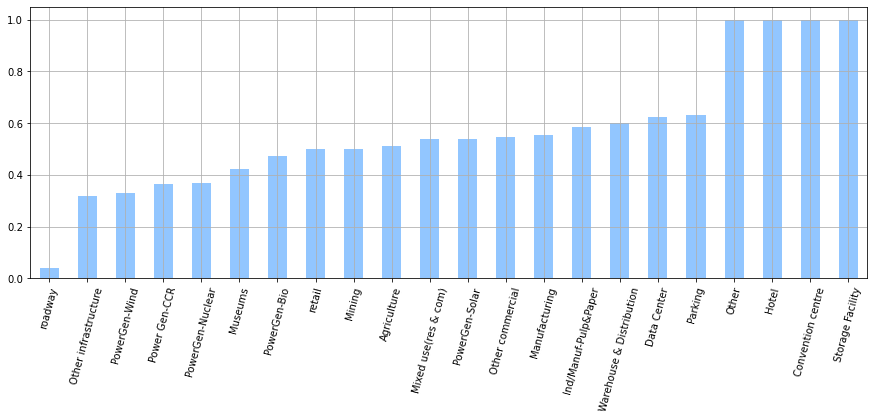

In [66]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=75,grid=True)
# %%
plt.savefig("market_id_2_percent", dpi=400,bbox_inches="tight",pad_inches=1)

## Segment

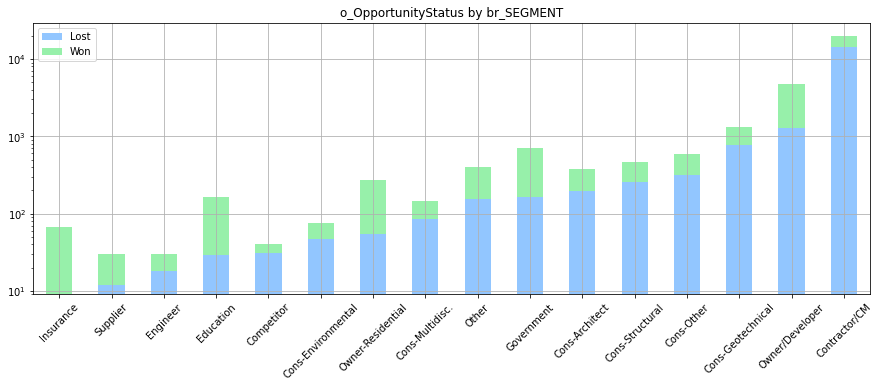

In [67]:
# %%
#df = pd.read_csv("Keller GroundWorks CRM Data 1.txt", sep = "\t", encoding = "ISO-8859-1")
# %%
## Bar plot
gr = df[['o_OpportunityStatus', "br_SEGMENT", "ID"]].groupby(["br_SEGMENT", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["br_SEGMENT"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["br_SEGMENT"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["br_SEGMENT"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
#df_plot.loc[(df_plot.index == "Won") | (df_plot.index == "Lost") ,:].T.plot.bar(figsize = (15,5), logy=True, rot=75) #df_plot.columns != "Drilled Shaft"]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]

df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Lost",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5), rot=45,logy=True,grid=True, title = "o_OpportunityStatus by br_SEGMENT",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("segment", dpi=400,bbox_inches="tight",pad_inches=1)

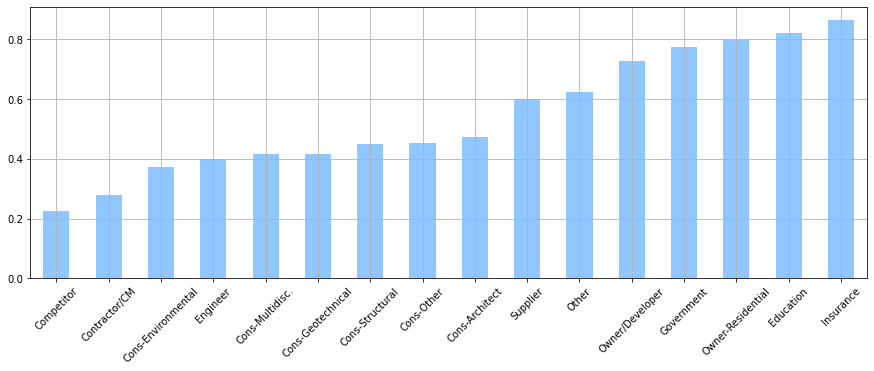

In [68]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=45,grid=True)
# %%
plt.savefig("segment_percent", dpi=400,bbox_inches="tight",pad_inches=1)

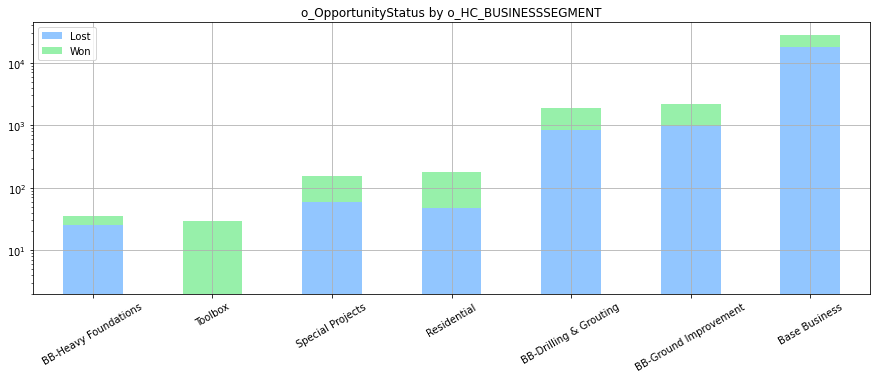

In [69]:
# %%
#df = pd.read_csv("Keller GroundWorks CRM Data 1.txt", sep = "\t", encoding = "ISO-8859-1")
# %%
## Bar plot
gr = df[['o_OpportunityStatus', "o_HC_BUSINESSSEGMENT", "ID"]].groupby(["o_HC_BUSINESSSEGMENT", 'o_OpportunityStatus']).count()
gr2 = gr.reset_index(level=0).reset_index()
# %%
df_plot = pd.DataFrame()
for col in np.unique(gr2["o_HC_BUSINESSSEGMENT"]):
    for row in np.unique(gr2['o_OpportunityStatus'][gr2["o_HC_BUSINESSSEGMENT"]==col]):
        df_plot.loc[row, col] = gr2['ID'][(gr2["o_HC_BUSINESSSEGMENT"]==col) & (gr2["o_OpportunityStatus"]==row)].to_numpy()[0]
# %%
#df_plot.loc[(df_plot.index == "Won") | (df_plot.index == "Lost") ,:].T.plot.bar(figsize = (15,5), logy=True, rot=75) #df_plot.columns != "Drilled Shaft"]
# %%
df_plot2 = df_plot.T.sort_values('Won')
df_plot2.loc[:,(df_plot.index == "Won") | (df_plot.index == "Lost") ]

df_plot2.fillna(0, inplace=True)
df_plot2.sort_values(by="Won",ascending=True, inplace=True)
df_plot2.plot(kind="bar",figsize = (15,5), rot=30,logy=True,grid=True, title = "o_OpportunityStatus by o_HC_BUSINESSSEGMENT",stacked = True) #[df_plot.columns != "Drilled Shaft"]
plt.savefig("businesssegment", dpi=400,bbox_inches="tight",pad_inches=1)

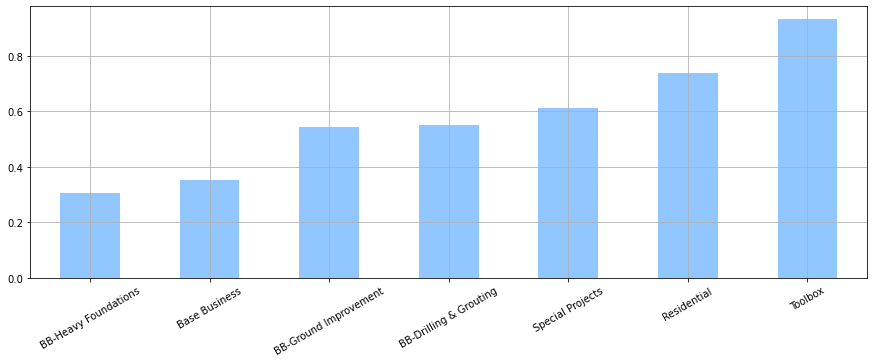

In [70]:
# %%
df_plot2.loc[:,"All"] = df_plot2.loc[:,"Lost"] + df_plot2.loc[:,"Won"]  
#df_plot2.sum(axis=1)
df_plot2.loc[:,"Won_p"] = df_plot2.loc[:,"Won"] / df_plot2.loc[:,"All"]
df_plot2 = df_plot2.sort_values('Won_p')
df_plot2["Won_p"].plot.bar(figsize = (15,5),rot=30,grid=True)
# %%
plt.savefig("businesssegment_percent", dpi=400,bbox_inches="tight",pad_inches=1)

In [71]:
chart_data = pd.concat([
	df['o_HC_MARKETID'],
	df['sq_HC_AMOUNT'],
], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data = chart_data.rename(columns={'o_HC_MARKETID': 'x'})
chart_data_mean = chart_data.groupby(['x'])[['sq_HC_AMOUNT']].mean()
chart_data_mean.columns = ['sq_HC_AMOUNT|mean']
chart_data = chart_data_mean.reset_index()
chart_data = chart_data.dropna()
chart_data.sort_values(by='sq_HC_AMOUNT|mean',inplace=True)
import plotly.graph_objs as go

charts = []
charts.append(go.Bar(x=chart_data['x'],y=chart_data['sq_HC_AMOUNT|mean']))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Mean of sq_HC_AMOUNT by o_HC_MARKETID'},
    'xaxis': {'title': {'text': 'o_HC_MARKETID'}},
    'yaxis': {'range': [1050, 3000000], 'title': {'text': 'Mean of sq_HC_AMOUNT'}, 'type': 'linear'}}))

figure

# AMOUNT

In [72]:
plt.style.use('seaborn-dark-palette')

In [73]:
df = df[df["o_OpportunityStatus"]=="Won"]

<AxesSubplot:>

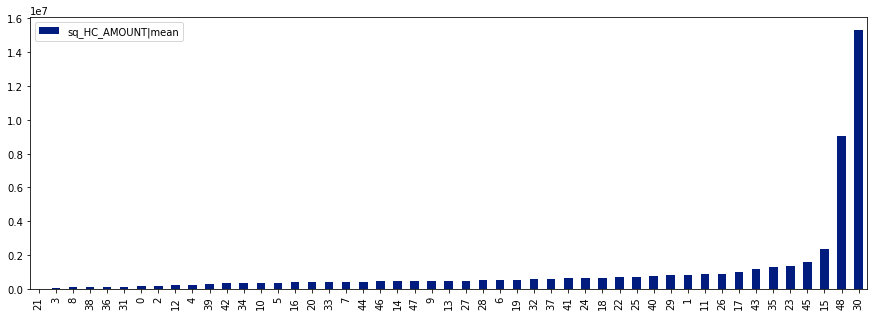

In [74]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_AMOUNT'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data = chart_data.rename(columns={'o_HC_MARKETID': 'x'})
chart_data_mean = chart_data.groupby(['x'])[['sq_HC_AMOUNT']].mean()
chart_data_mean.columns = ['sq_HC_AMOUNT|mean']
chart_data = chart_data_mean.reset_index()
chart_data = chart_data.dropna()
chart_data.sort_values(by='sq_HC_AMOUNT|mean',inplace=True)

chart_data.plot(kind="bar",figsize=(15,5))

## MARKET ID

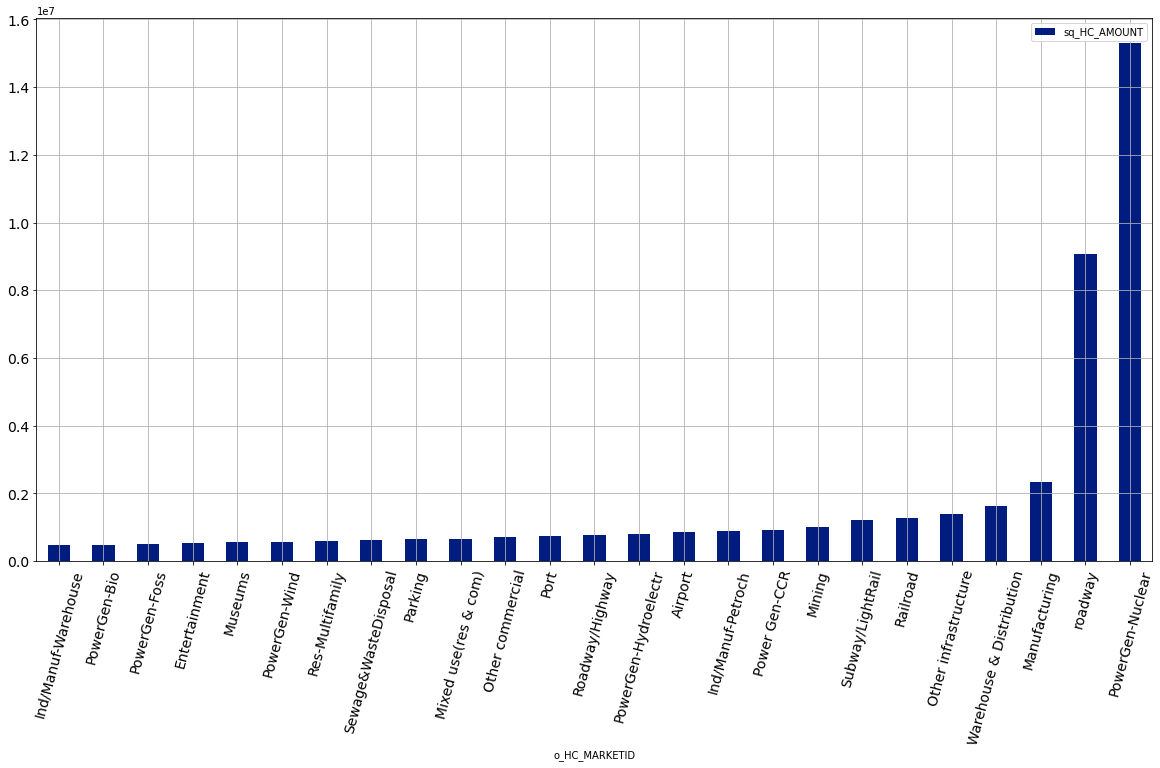

In [75]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_AMOUNT'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_MARKETID").mean()
chart_plot.sort_values(by='sq_HC_AMOUNT',inplace=True)
chart_plot=chart_plot.iloc[24:]
chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=14)
plt.savefig("amount_by_marketid_1", dpi=400,bbox_inches="tight",pad_inches=1)

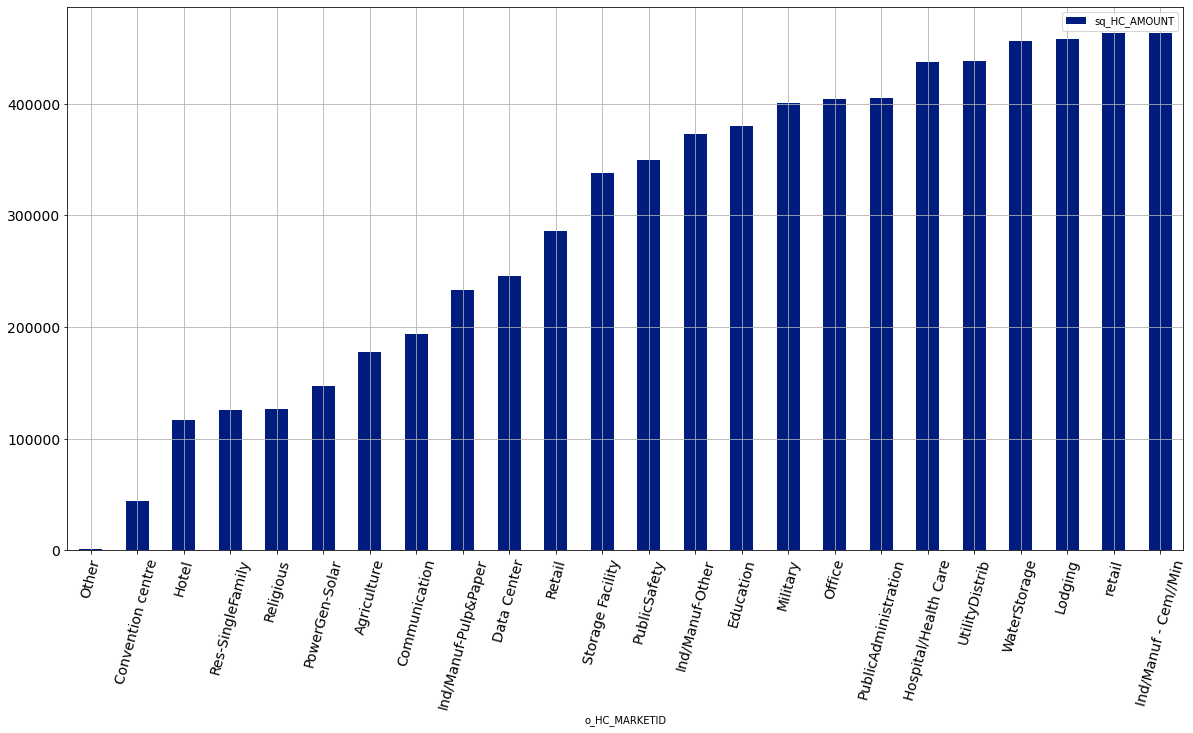

In [76]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_AMOUNT'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_MARKETID").mean()
chart_plot.sort_values(by='sq_HC_AMOUNT',inplace=True)
chart_plot=chart_plot.iloc[:24]
chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,fontsize=14)
plt.savefig("amount_by_marketid_2", dpi=400,bbox_inches="tight",pad_inches=1)

## FUNDING ID

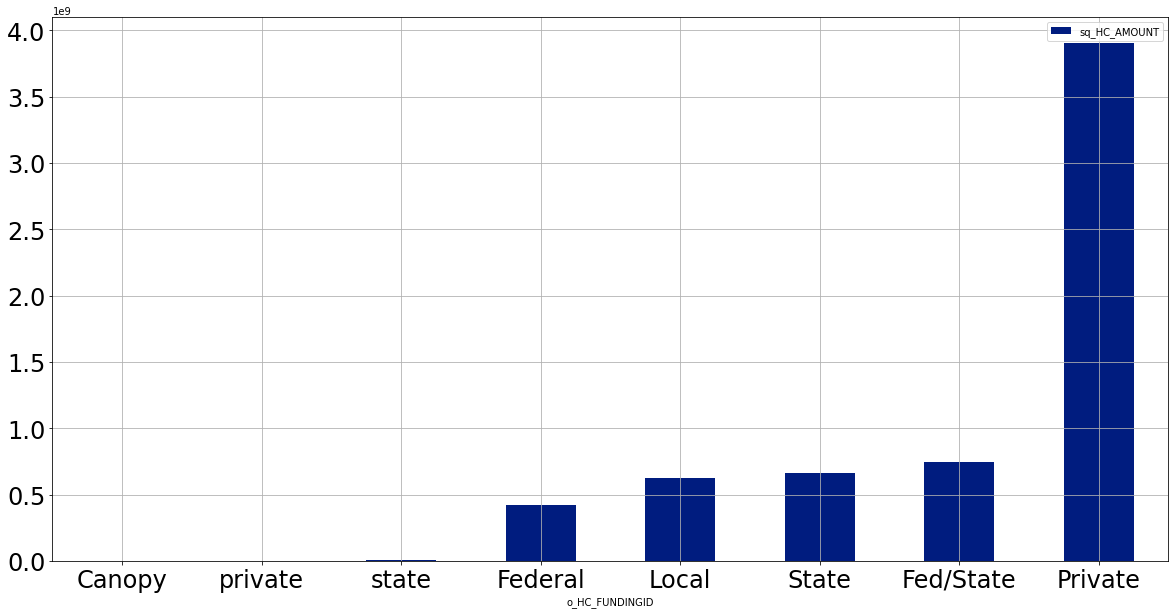

In [77]:
chart_data = pd.concat([df['o_HC_FUNDINGID'],df['sq_HC_AMOUNT'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_FUNDINGID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_FUNDINGID").sum()
chart_plot.sort_values(by='sq_HC_AMOUNT',inplace=True)
#chart_plot=chart_plot.iloc[24:]
chart_plot.plot(kind="bar",figsize=(20,10),rot=0,grid=True,style="plain",fontsize=24)
plt.savefig("amount_by_fundingid", dpi=400,bbox_inches="tight",pad_inches=1)

## it_HC_INFLUENCERROLE

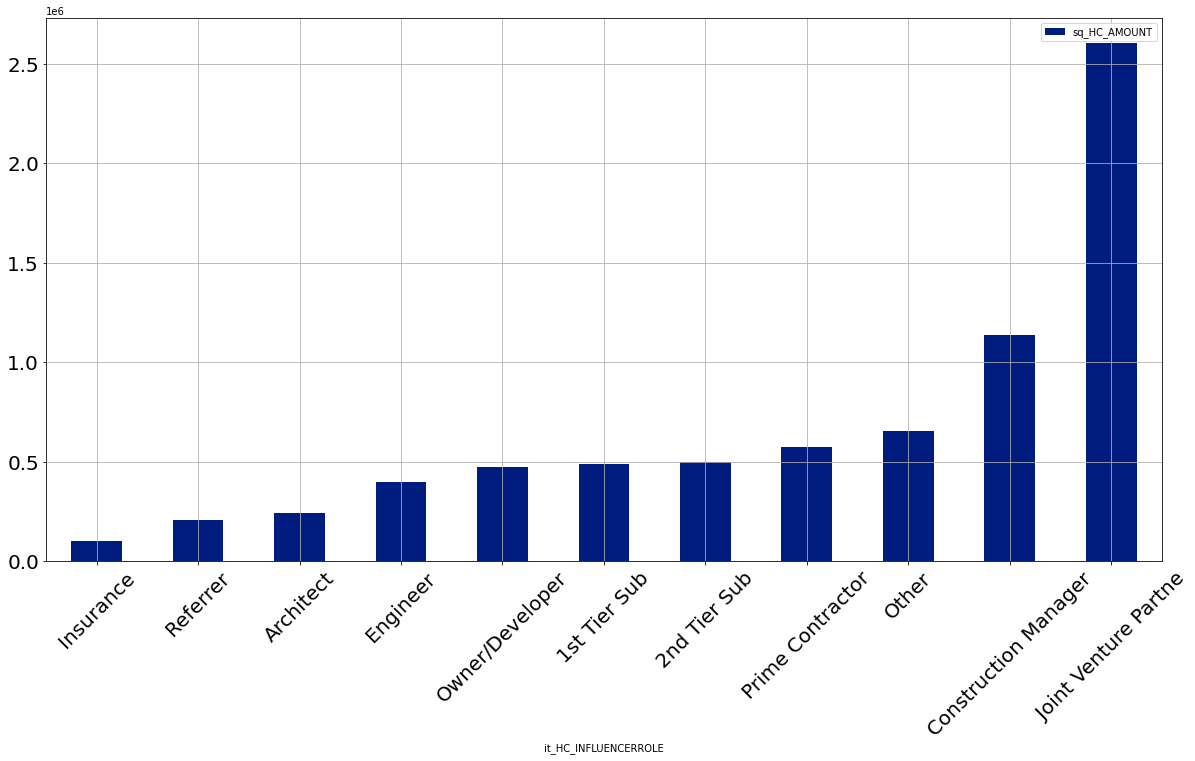

In [78]:
chart_data = pd.concat([df['it_HC_INFLUENCERROLE'],df['sq_HC_AMOUNT'],], axis=1)
chart_data = chart_data.sort_values(['it_HC_INFLUENCERROLE'])
chart_data.dropna()
chart_plot=chart_data.groupby("it_HC_INFLUENCERROLE").mean()
chart_plot.sort_values(by='sq_HC_AMOUNT',inplace=True)
#chart_plot=chart_plot.iloc[24:]

chart_plot.plot(kind="bar",figsize=(20,10),rot=45,grid=True,style="plain",fontsize=20)
#plt.plot(chart_plot.index,chart_plot['sq_HC_AMOUNT'],kind="bar",figsize=(20,10),rot=45,grid=True,style="plain",fontsize=14)
plt.savefig("amount_by_it_HC_INFLUENCERROLE", dpi=400,bbox_inches="tight",pad_inches=1)

# ESTGMPCT

## MARKETID

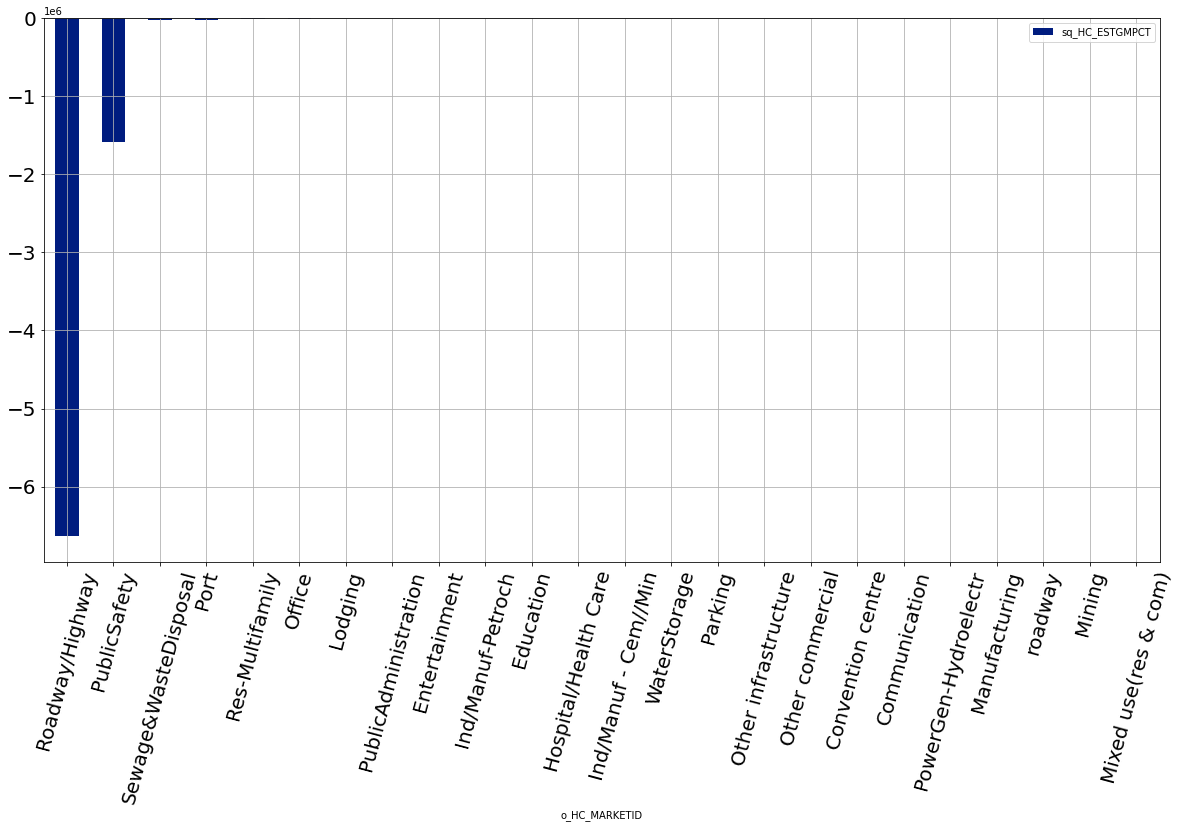

In [79]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_ESTGMPCT'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_MARKETID").mean()
chart_plot.sort_values(by='sq_HC_ESTGMPCT',inplace=True)
chart_plot=chart_plot.iloc[:24]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20)
plt.savefig("estgmpct_by_o_HC_MARKETID", dpi=400,bbox_inches="tight",pad_inches=1)

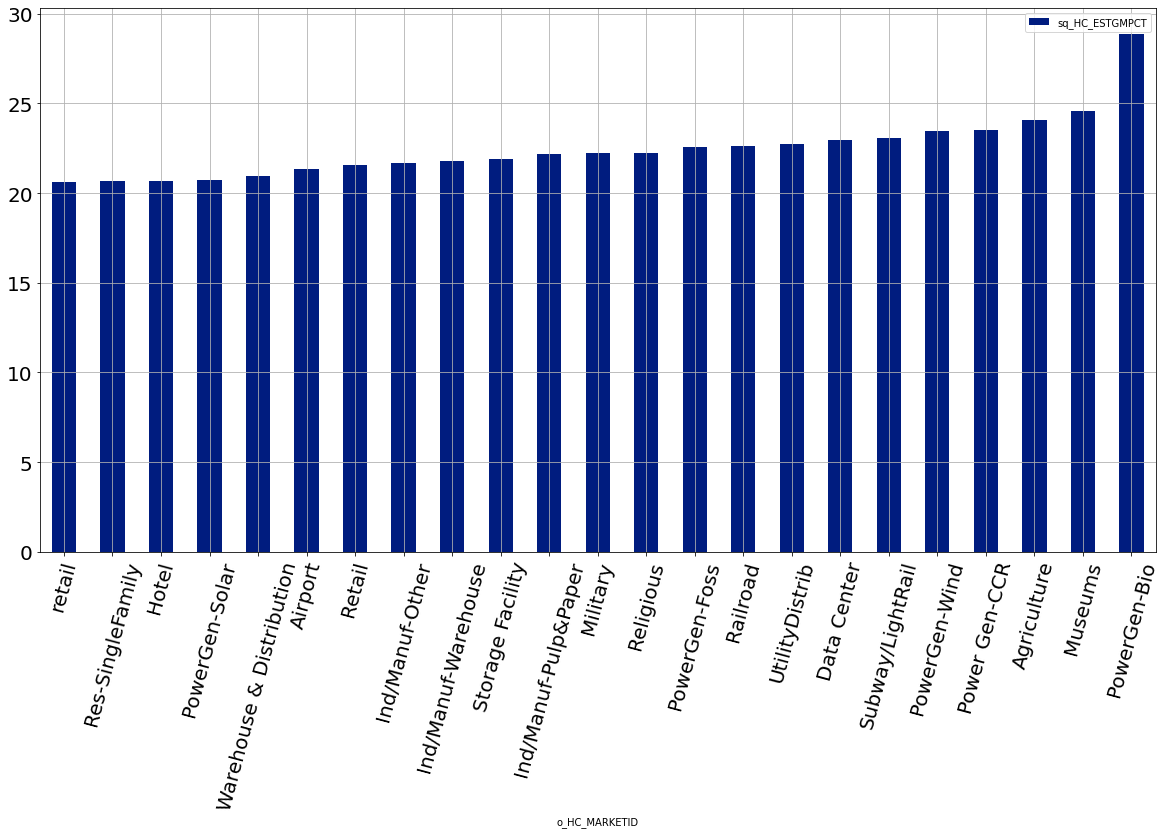

In [80]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_ESTGMPCT'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_MARKETID").mean()
chart_plot.sort_values(by='sq_HC_ESTGMPCT',inplace=True)
chart_plot=chart_plot.iloc[24:47]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20)
plt.savefig("estgmpct_by_o_HC_MARKETID", dpi=400,bbox_inches="tight",pad_inches=1)

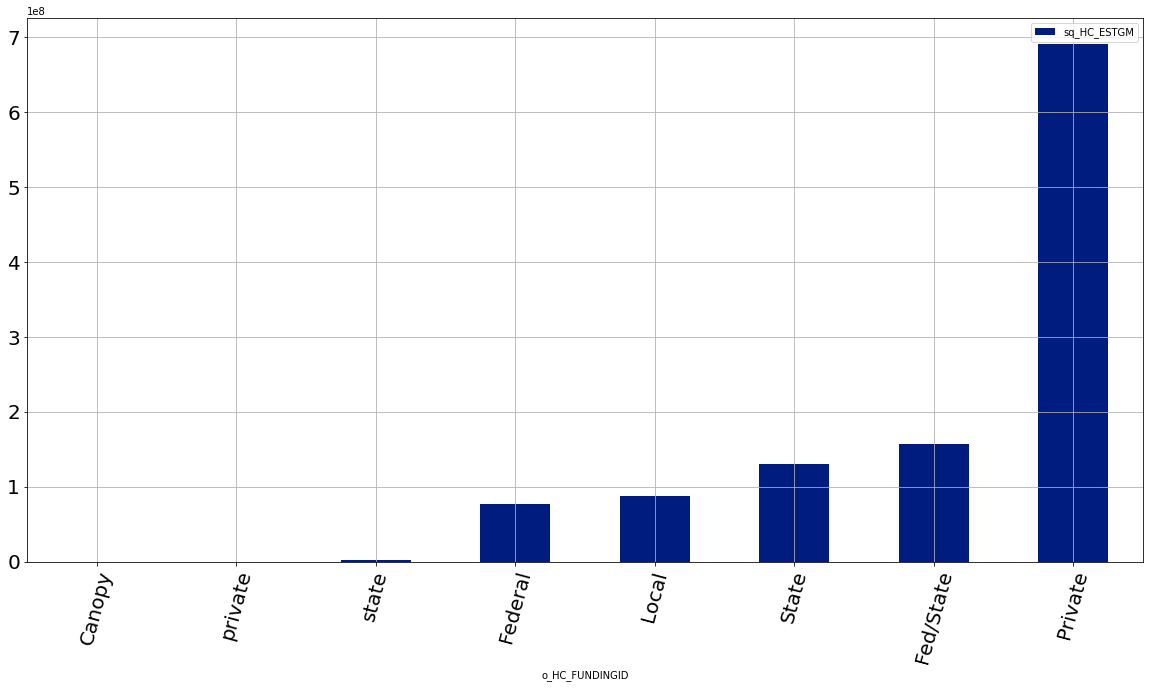

In [81]:
chart_data = pd.concat([df['o_HC_FUNDINGID'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_FUNDINGID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_FUNDINGID").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
#chart_plot=chart_plot.iloc[:24]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20)
plt.savefig("estgm_by_o_HC_FUNDINGID", dpi=400,bbox_inches="tight",pad_inches=1)

# ESTGM

# MARKETID

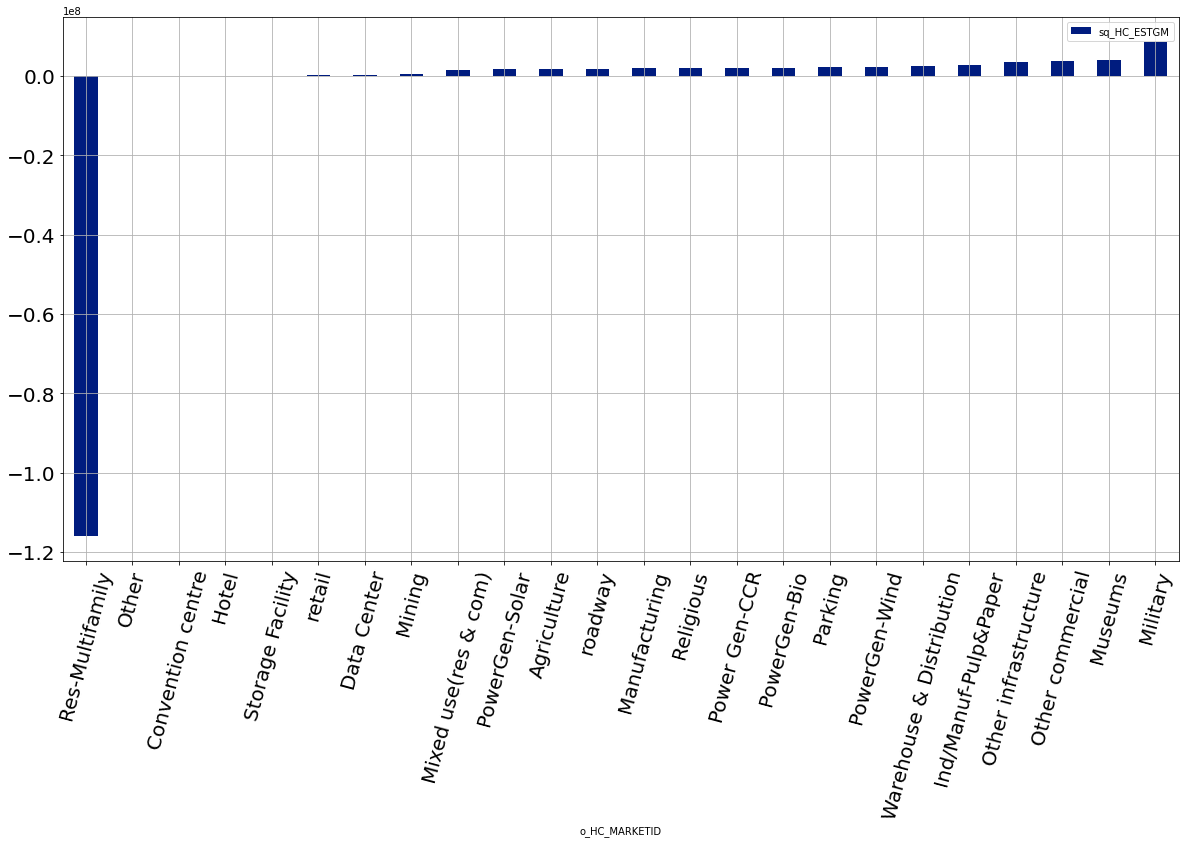

In [82]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_MARKETID").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
chart_plot=chart_plot.iloc[:24]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20)
plt.savefig("estgm_by_o_HC_MARKETID1", dpi=400,bbox_inches="tight",pad_inches=1)

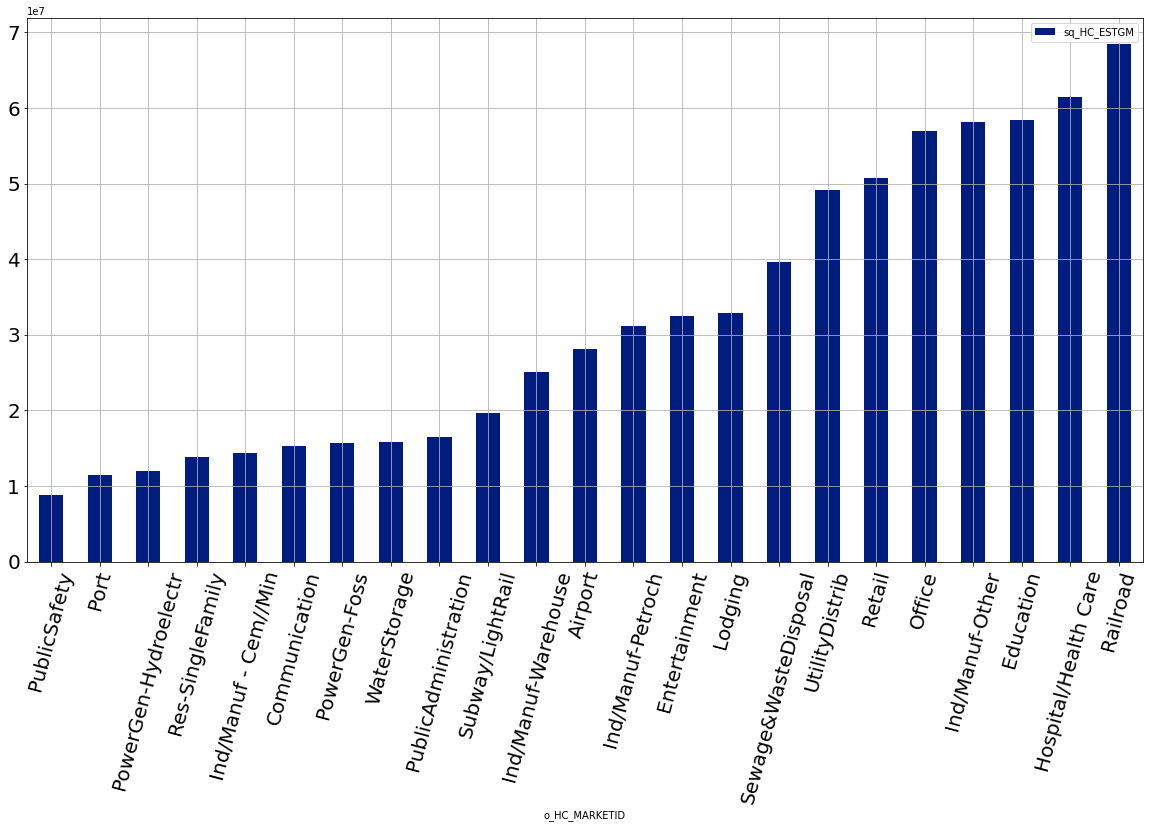

In [83]:
chart_data = pd.concat([df['o_HC_MARKETID'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_MARKETID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_MARKETID").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
chart_plot=chart_plot.iloc[24:47]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20)
plt.savefig("estgm_by_o_HC_MARKETID2", dpi=400,bbox_inches="tight",pad_inches=1)

# FUNDING ID

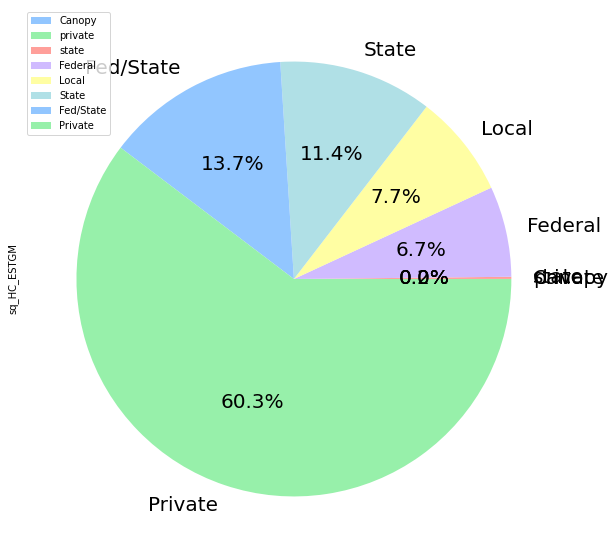

In [84]:
plt.style.use('seaborn-pastel')
chart_data = pd.concat([df['o_HC_FUNDINGID'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_FUNDINGID'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_FUNDINGID").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
#chart_plot=chart_plot.iloc[:24]

chart_plot.plot(kind="pie",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20,subplots=True, autopct='%1.1f%%')
plt.savefig("estgm_by_o_HC_FUNDINGID_pie", dpi=400,bbox_inches="tight",pad_inches=1)

In [85]:
plt.style.use('seaborn-dark-palette')

# INFLUENCER ROLE

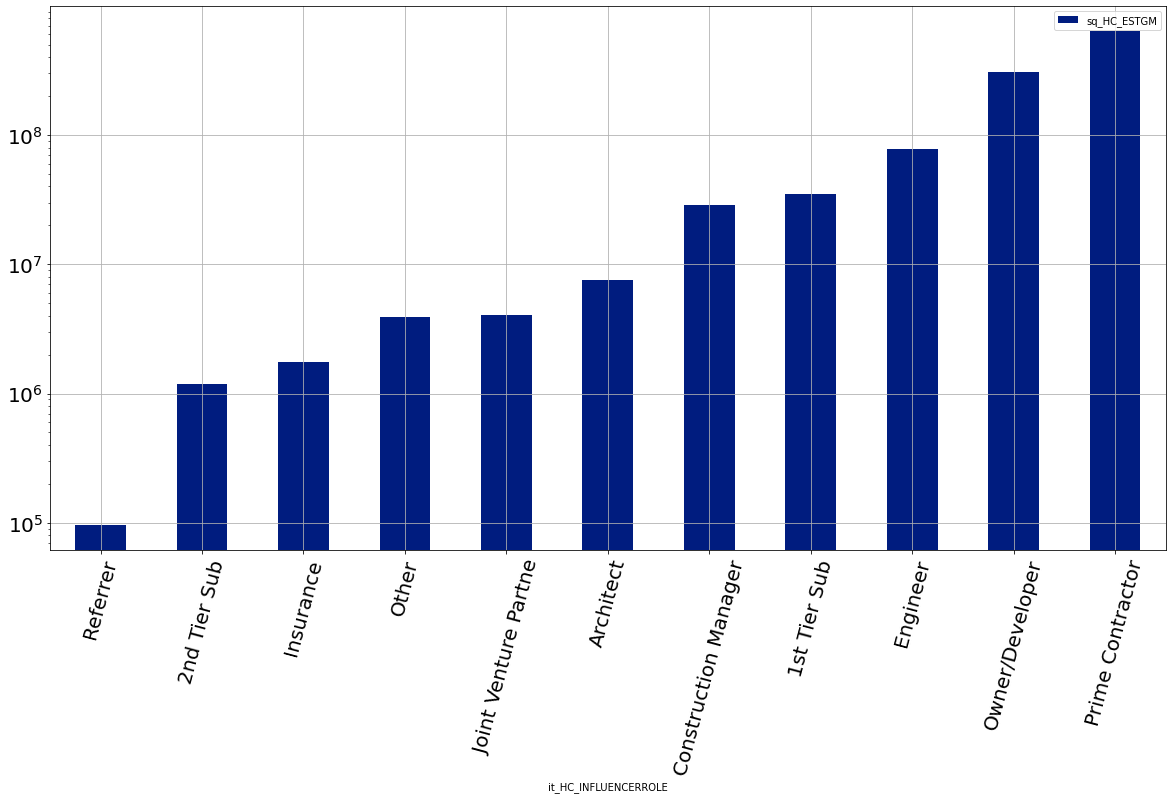

In [86]:
chart_data = pd.concat([df['it_HC_INFLUENCERROLE'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['it_HC_INFLUENCERROLE'])
chart_data.dropna()
chart_plot=chart_data.groupby("it_HC_INFLUENCERROLE").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
#chart_plot=chart_plot.iloc[:24]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=20,logy=True)
plt.savefig("estgm_by_it_HC_INFLUENCERROLE", dpi=400,bbox_inches="tight",pad_inches=1)

# STATE

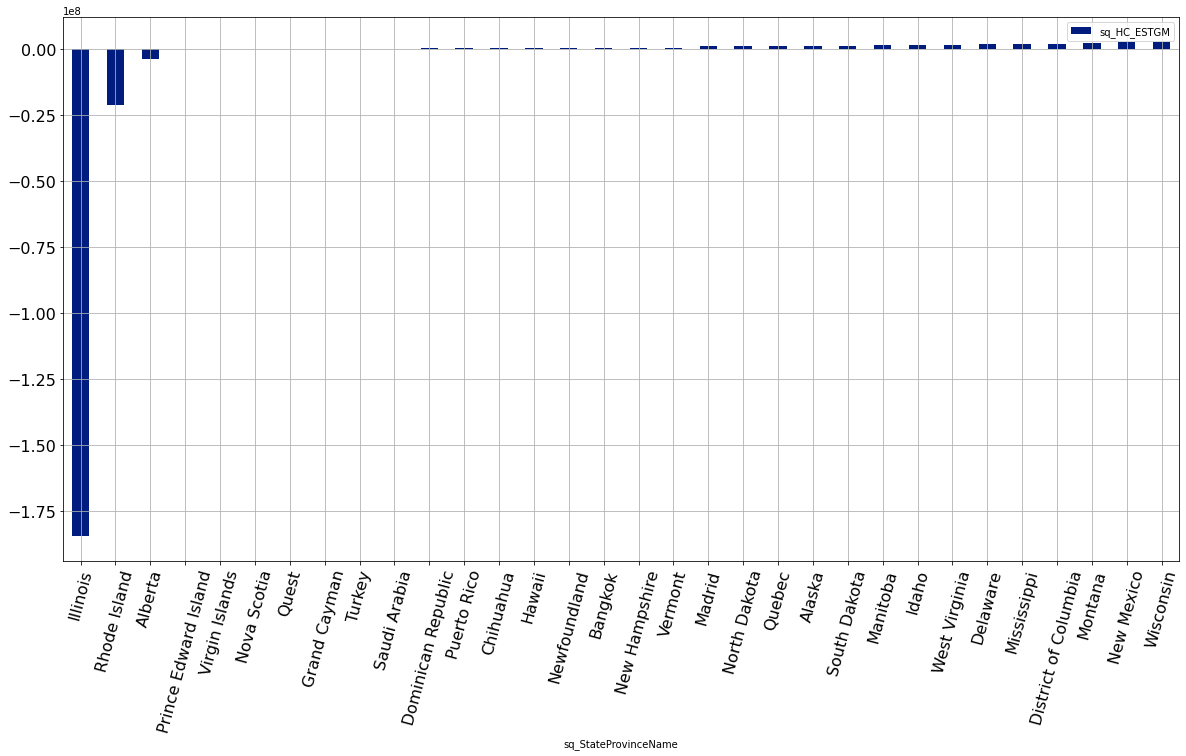

In [87]:
chart_data = pd.concat([df['sq_StateProvinceName'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['sq_StateProvinceName'])
chart_data.dropna()
chart_plot=chart_data.groupby("sq_StateProvinceName").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
chart_plot=chart_plot.iloc[:32]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=16,logy=False)
plt.savefig("estgm_by_sq_StateProvinceName1", dpi=400,bbox_inches="tight",pad_inches=1)

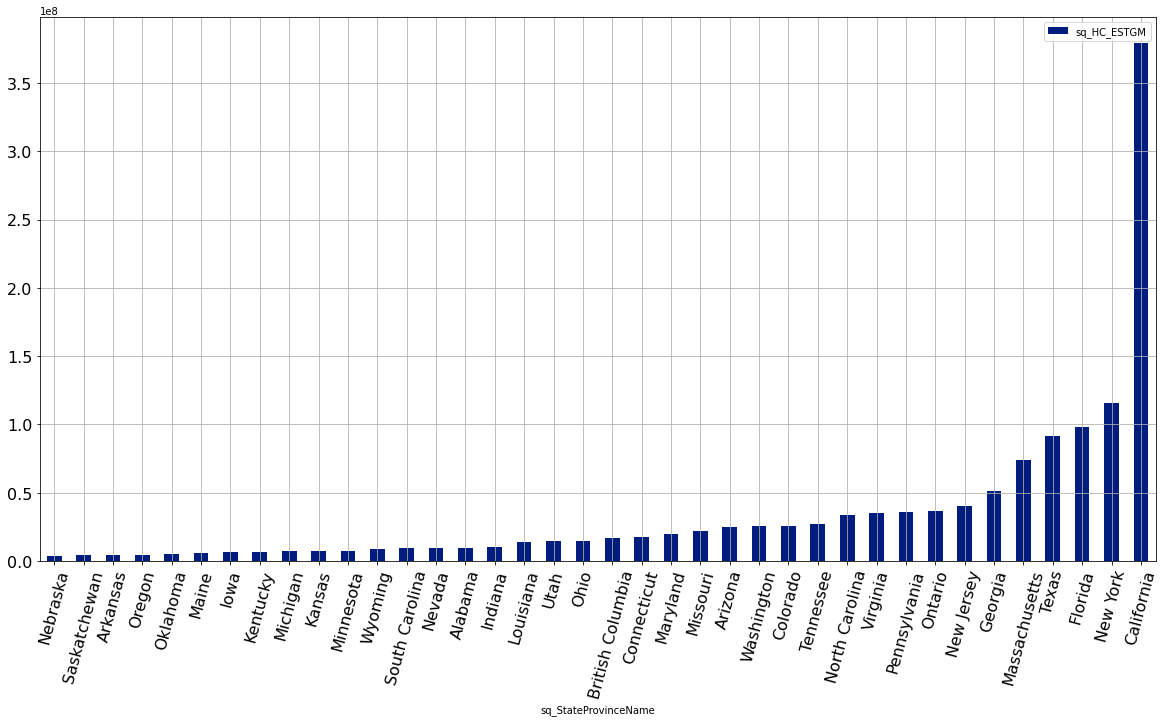

In [88]:
chart_data = pd.concat([df['sq_StateProvinceName'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['sq_StateProvinceName'])
chart_data.dropna()
chart_plot=chart_data.groupby("sq_StateProvinceName").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
chart_plot=chart_plot.iloc[32:]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=16,logy=False)
plt.savefig("estgm_by_sq_StateProvinceName2", dpi=400,bbox_inches="tight",pad_inches=1)

## STRUCTURE


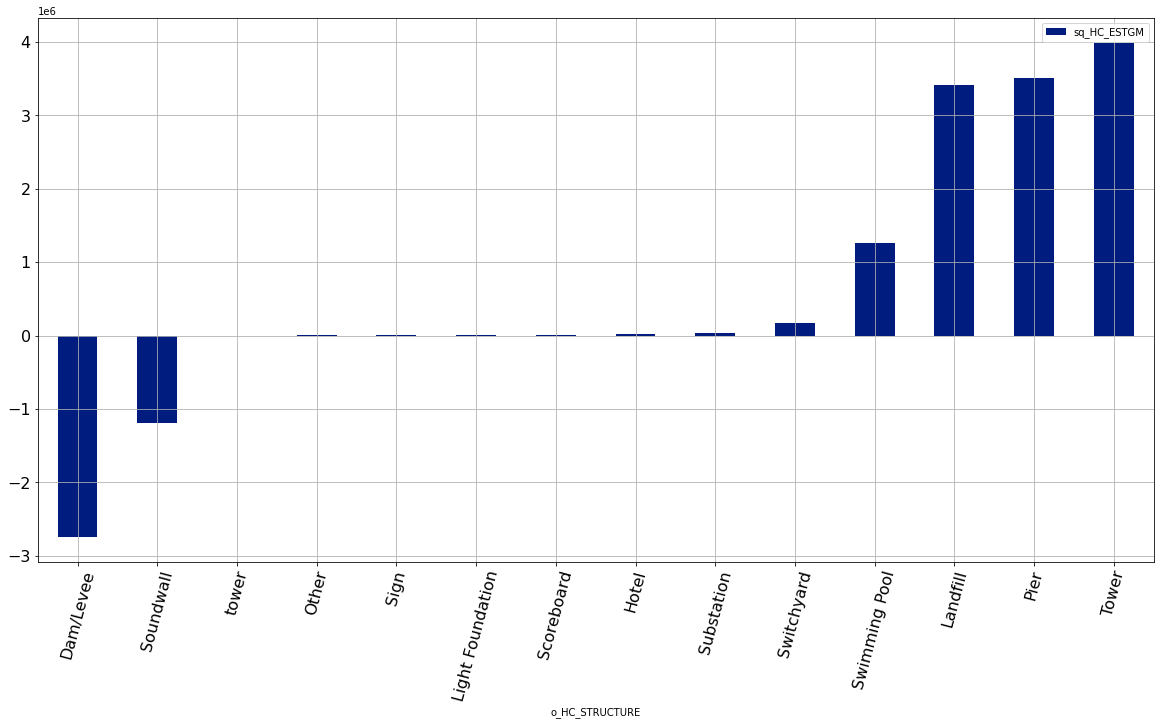

In [89]:
chart_data = pd.concat([df['o_HC_STRUCTURE'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_STRUCTURE'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_STRUCTURE").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
chart_plot=chart_plot.iloc[:14]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=16,logy=False)
plt.savefig("estgm_by_o_HC_STRUCTURE1", dpi=400,bbox_inches="tight",pad_inches=1)

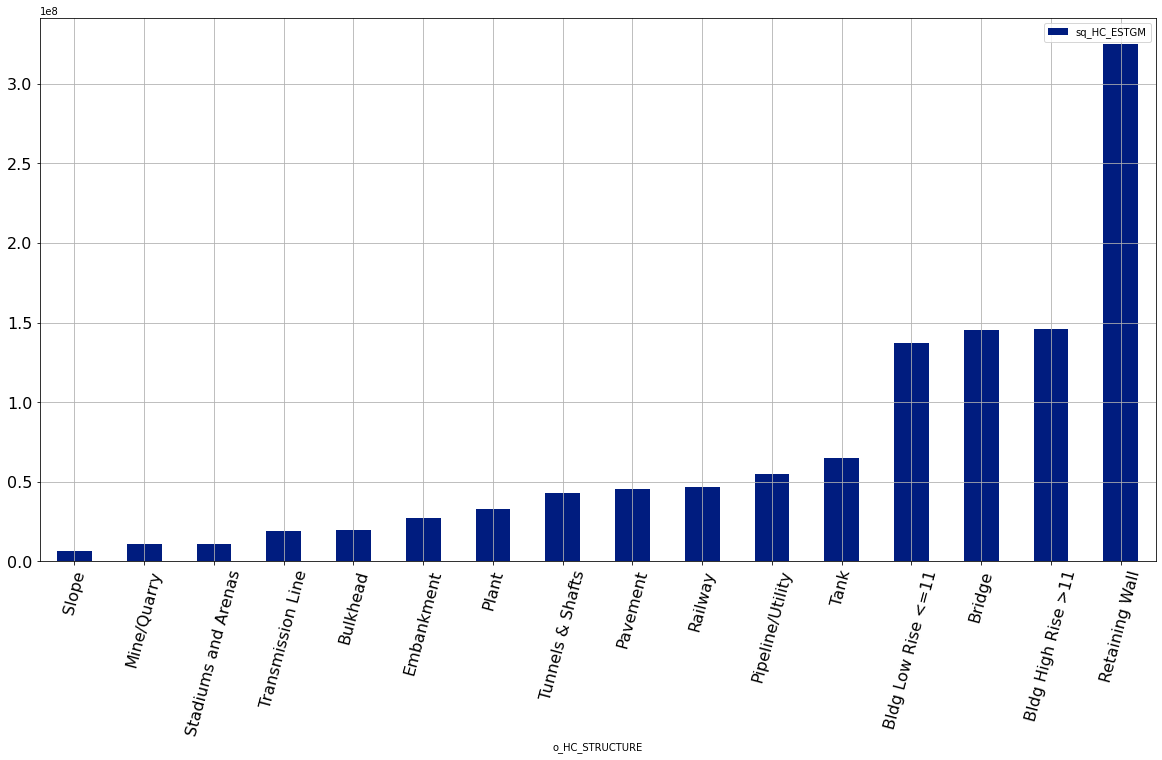

In [90]:
chart_data = pd.concat([df['o_HC_STRUCTURE'],df['sq_HC_ESTGM'],], axis=1)
chart_data = chart_data.sort_values(['o_HC_STRUCTURE'])
chart_data.dropna()
chart_plot=chart_data.groupby("o_HC_STRUCTURE").sum()
chart_plot.sort_values(by='sq_HC_ESTGM',inplace=True)
chart_plot=chart_plot.iloc[14:]

chart_plot.plot(kind="bar",figsize=(20,10),rot=75,grid=True,style="plain",fontsize=16,logy=False)
plt.savefig("estgm_by_o_HC_STRUCTURE2", dpi=400,bbox_inches="tight",pad_inches=1)